# **Sistemas de EDO's**

## **Alumno: Niño Pedraza Eduardo**

## **Problema 1**

Resuelva el siguiente Problema de Valores Iniciales (PVI) para un sistema lineal de Ecuaciones Diferenciales Ordinarias (EDOs):

$\frac{d \overrightarrow{y}}{dt}= A\overrightarrow{y}$

Donde el vector $\overrightarrow{y(t)}$ y la matriz de coeficientes $A$ están dados por:

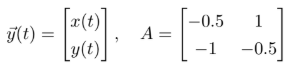

Tomaremos las condiciones iniciales siguientes:

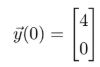

1. Encuentre la solución numérica en el intervalo de tiempo $t \in[0, 20]$. Apoyese del paquete ***solve ivp***


*   Defina la función del sistema de EDOs en formato matricial, recibira el tiempo $t$ y el vector $\overrightarrow{y}$. Es decir si su sistema es de la forma: $\frac{d \overrightarrow{y}}{dt}= A\overrightarrow{y}$ su función se verá como:

        def sistema(t, Y):

        return A @ Y



In [ ]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Definimos la matriz A
A = np.array([
    [-0.5, 1.0],
    [-1.0, -0.5]])

# Función del sistema
def sistema1(t, Y):
    return A @ Y



*   Defina el vector de valores iniciales y el intervalo de tiempo en donde se quiere analizar la solución.



In [ ]:
#Definimos los valores iniciales
y0_1 = np.array([4.0, 0.0])

#Definimos el intervalo de tiempo
t_span = (0.0, 20.0)



*   Defina los puntos en donde se evaluará la solución.



In [ ]:
#Definimos donde se va a evaluar la solución
t_eval = np.linspace(t_span[0], t_span[1], 1000)



*   Finalmente use ***solve ivp***, este paso tendrá un aspecto similar al siguiente:

        solucion = solve_ivp(
        fun=sistema,
        t_span=intervalo de tiempo a analizar,
        y0=vector de condiciones iniciales,
        t_eval=puntos en donde se evaluar ́a la solución)

In [ ]:
#Resolvemos usando solve ivp
sol1 = solve_ivp(fun=sistema1, t_span=t_span, y0=y0_1,
                 t_eval=t_eval, method='RK45')
sol1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.002e-02 ...  1.998e+01  2.000e+01]
        y: [[ 4.000e+00  3.959e+00 ...  8.016e-05  7.608e-05]
            [ 0.000e+00 -7.928e-02 ... -1.648e-04 -1.647e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 170
     njev: 0
      nlu: 0



*  Grafique la trayectoria resultante en el espacio $(t, x(t), y(t))$.



Text(0.5, 0.92, 'Trayectoria en el espacio (t, x(t), y(t))')

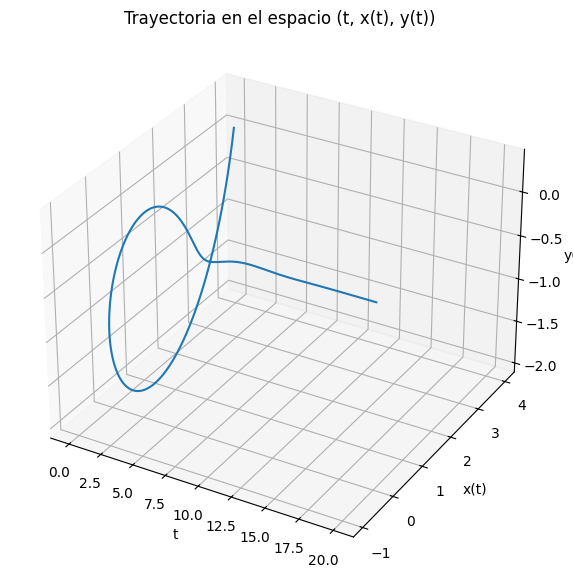

In [ ]:
#Trayectoria (t, x(t), y(t))
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(sol1.t, sol1.y[0], sol1.y[1])
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.set_zlabel('y(t)')
ax1.set_title('Trayectoria en el espacio (t, x(t), y(t))')



*   Grafique las soluciones individuales respecto al tiempo, es decir $x$ vs $t$ y $y$ vs $t$.


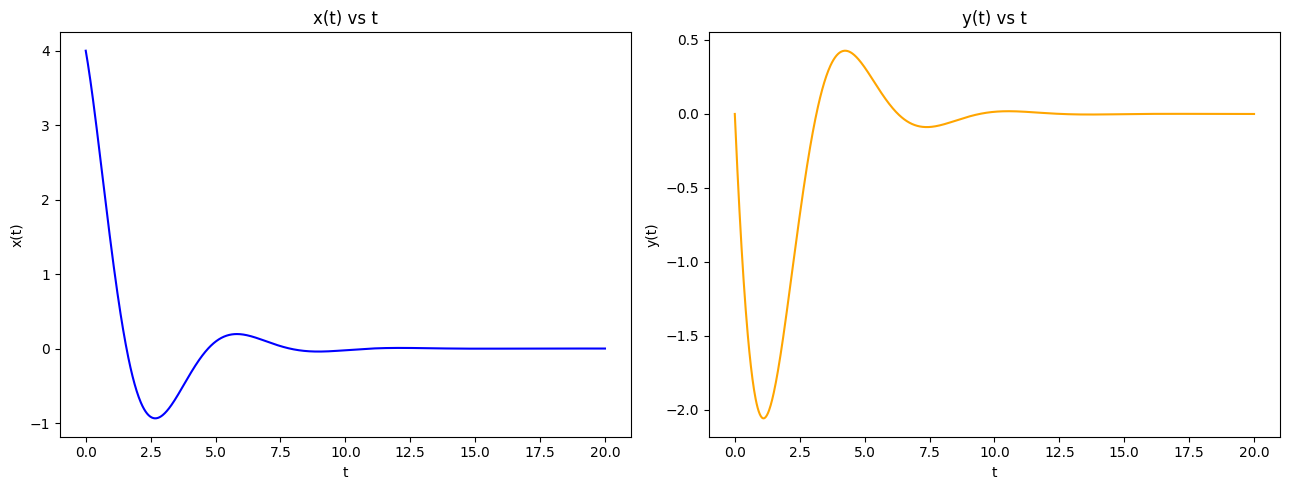

In [ ]:
#Gramicamos x y y respecto al tiempo por separado
fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(13, 5), sharex=True)
ax2a.plot(sol1.t, sol1.y[0], color='blue')
ax2a.set_ylabel('x(t)')
ax2a.set_xlabel('t')
ax2a.set_title('x(t) vs t')
ax2b.plot(sol1.t, sol1.y[1], color='orange')
ax2b.set_ylabel('y(t)')
ax2b.set_xlabel('t')
ax2b.set_title('y(t) vs t')

plt.tight_layout()
plt.show()

## **Problema 2**

Consideremos la ecuación diferencial de segundo orden que modela un sistema de resorte con masa amortiguado:

$m\frac{d^2 x}{dt^2}+c\frac{dx}{dt}+kx=0$



*   Convierta la ecuación de segundo orden en un sistema de ecuaciones de primer orden. Para ello, defina el vector de estado $\overrightarrow{y}$ como:

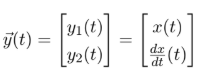

  Y escriba el sistema resultante en la forma matricial $\frac{d \overrightarrow{y}}{dt}= A\overrightarrow{y}$




**Solución:** Definimos $𝑦_1=𝑥$ y $y_2=\frac{dx}{dt}$. Entonces nuestro sistema queda de la siguiente manera:

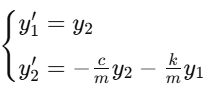

Escrito en forma matricial tenemos:

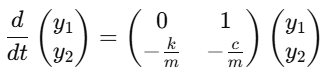



*   Considerando los siguiente parámetros y valores iniciales resuelva numericamente el sistema: Masa, $m = 1.0 kg$ ; constante del resorte, $k = 10.0 \frac{N}{m}$ y coeficiente de amortiguamiento, $c = 1.0 \frac{Ns}{m}$. Las condiciones iniciales son: $x(0) = 2$, $\frac{dx}{dt}(0) = 0$. Lo que corresponde al vector inicial:

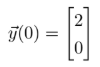









In [ ]:
#Definimos los parámetros iniciales
m = 1.0   # masa
k = 10.0  # constante del resorte
c = 1.0   # coeficiente de amortiguamiento

#Definicion del sistema de ecuaciones
def sistema2(t, Y):
    y1, y2 = Y
    dy1 = y2
    dy2 = -(c/m) * y2 - (k/m) * y1
    return [dy1, dy2]

# Condiciones iniciales
y0_2 = [2.0, 0.0]



*   Encuentre la solución en el intervalo de tiempo $t\in[0, 15]$


In [ ]:
#Definimos el intervalo de tiempo y donde queremos evaluar
t_span = (0.0, 15.0)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver con solve_ivp
sol2 = solve_ivp(fun=sistema2, t_span=t_span, y0=y0_2,
                 t_eval=t_eval, method='RK45')
sol2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.502e-02 ...  1.498e+01  1.500e+01]
        y: [[ 2.000e+00  1.998e+00 ... -9.860e-04 -1.002e-03]
            [ 0.000e+00 -2.979e-01 ... -1.134e-03 -9.686e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 374
     njev: 0
      nlu: 0



*   Grafique la posición $x(t)$ y la velocidad $\frac{dx}{dt}(t)$ en función del tiempo.


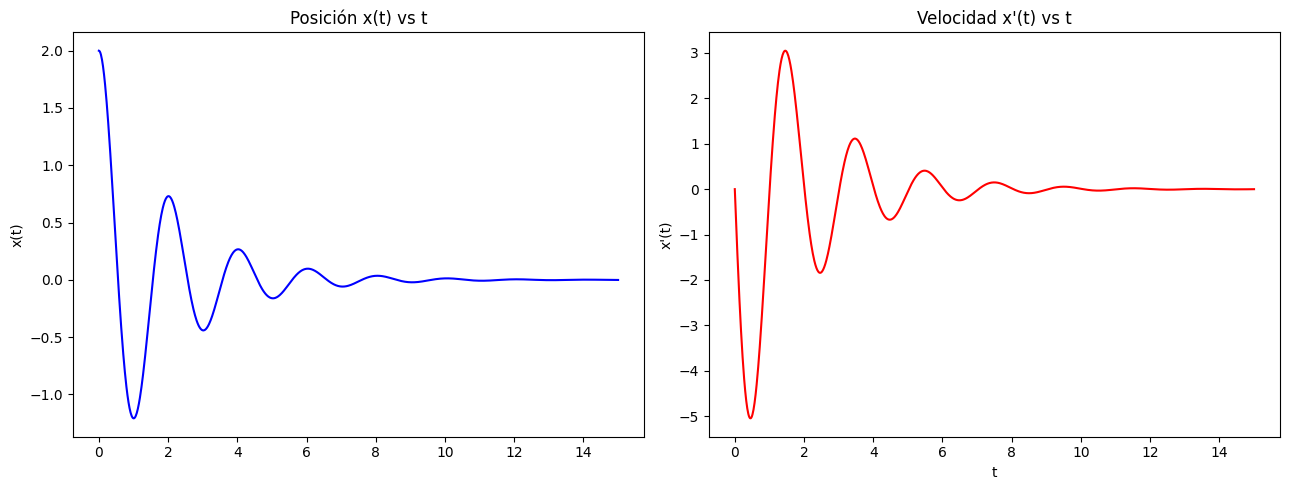

In [ ]:
#Graficamos la posición y velocidad
fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(13, 5), sharex=True)
ax3a.plot(sol2.t, sol2.y[0], color='blue')
ax3a.set_ylabel('x(t)')
ax3b.set_xlabel('t')
ax3a.set_title('Posición x(t) vs t')
ax3b.plot(sol2.t, sol2.y[1], color='red')
ax3b.set_ylabel("x'(t)")
ax3b.set_xlabel('t')
ax3b.set_title('Velocidad x\'(t) vs t')

plt.tight_layout()
plt.show()



*   Finalmente graficamos la trayectoria $(t, x(t), x'(t))$



Text(0.5, 0.92, "Trayectoria en el espacio (t, x(t), x'(t))")

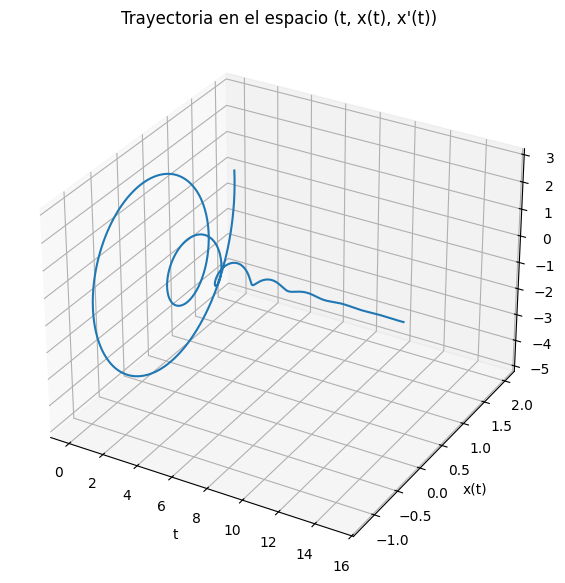

In [ ]:
#Trayectoria (t, x(t), x'(t))
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(sol2.t, sol2.y[0], sol2.y[1])
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.set_zlabel('x\'(t)')
ax1.set_title('Trayectoria en el espacio (t, x(t), x\'(t))')